Definition of working folder

In [53]:
Dirname <- "/working/02_Time_Series_Analysis"
Dirs <- list.dirs(path=file.path("~"),recursive=T)
dir_wd <- names(unlist(sapply(Dirs,grep,pattern=Dirname))[1])
dir_wd <- paste(dir_wd,'01_Appunti/dati',sep='/')
setwd(dir_wd)
cat("Current working folder is ' : ", getwd())

Current working folder is ' :  C:/Users/T004314/Documents/GitHub/working/02_Time_Series_Analysis/01_Appunti/dati

# Time Series

Time/date objects are usually not interesting as standalone objects but
are used to annotate other data.
The most important application of this are time series where there is for
each time point a vector of (typically numeric) observations.
The observations are most easily arranged in a vector (of length $n$) or
an $n \times k$ matrix whose elements are ordered and indexed by $n$ different
times/dates.

Types of time series:
- irregular (unequally spaced),
- strictly regular (equally spaced),
- or have an underlying regularity, i.e., be created from a regular series by omitting some observations.

**For strictly regular series**: the whole time index can be reconstructed
from start, end and time difference between two observations. The
reciprocal value of the time difference is also called *frequency*.

**For irregular series**: all time indexes need to be stored in a vector of
length $n$.

**Time Series: Implementations**

There are many implementations for time series data in R.

Virtually all of them are focused on numeric data and fix some
particular class for the time index. The most important are:

- “ts” (base): regular “numeric” time index (e.g., annual, quarterly,monthly),
- “its” (its): irregular time index of class “POSIXct”,
- “irts” (tseries): irregular time index of class “POSIXct”,
- “timeSeries” (timeSeries): irregular time index of class “timeDate”,
- “zoo” (zoo): regular or irregular time index of arbitrary class.
- “xts” (xts): built on top of “zoo”, with specialized infrastructure for time indexes of class “Date”, “POSIXct”, “chron”, “timeDate”,“yearmon”, “yearqtr”, . . .

where classes "POSIXlt" and "POSIXct" represent calendar dates and times. 

**zoo package**


**The need for irregular time series**

The R system for statistical computing ships with a class for regularly spaced time series, "ts" in package stats, but has no native class
for irregularly spaced time series. With the increased interest in computational finance with R
over the last years several implementations of classes for irregular time series emerged which
are aimed particularly at finance applications.

zoo is an R package providing an S3 class with methods for **indexed totally ordered**
observations, such as discrete irregular time series. 

The simple idea for the creation of "zoo" objects is to have some vector or matrix of observations
x *which are totally ordered by some index vector*. In time series applications, this
index is a measure of time but every other numeric, character or even more abstract vector
that provides a total ordering of the observations is also suitable.

Its key design goals are independence
of a particular index/time/date class and consistency with base R and the "ts" class for
regular time series. A subclass "zooreg" embeds regular time series into
the "zoo" framework and thus bridges the gap between regular and irregular time series
classes in R.

Fore more details refer to 

In [54]:
vignette('zoo')

or download the [quick reference](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwjc5Mmyy57lAhXSbMAKHb76BDwQFjAAegQIARAC&url=https%3A%2F%2Fcran.r-project.org%2Fweb%2Fpackages%2Fzoo%2Fvignettes%2Fzoo-quickref.pdf&usg=AOvVaw1NvIzxDtxzdf3SU0N3yu0K)

Objects of class "zoo" are
created by the function

`zoo(x, order.by)`

where $x$ is the vector or matrix of observations and `order.by` is the index by which the observations should be ordered. Let's see an example.

***Exercises on zoo package*** 





In [56]:
read.table("ZooData.csv", header = TRUE, sep=",",stringsAsFactors = FALSE) -> inData

Click here for more [exercises](https://www.r-bloggers.com/zoo-time-series-exercises/)

**Euribor Time Series Example**

In [25]:
require(zoo)
# import del file contenente i dati relativi tasso euribor
#
# definizione del nome del file
file_name = paste(getwd(),'hist_euribor.csv',sep='/')
# import dati utilizzando la funzione read.csv
euribor <- read.csv(file_name, sep=';')
# convertiamo la data da text a Date
euribor$Date = as.Date(euribor$Date)
#
# Si estraggono le serie giornaliere dell'Euribor a 3 scadenze predefinite
# 1M, 3M e 6M
#
# Creation of 3 'zoo' object 
#
euribor1M = zoo(x=euribor$X1.Month,  order.by=euribor$Date) 
euribor6M = zoo(x=euribor$X6.Month,  order.by=euribor$Date) 
euribor1Y = zoo(x=euribor$X12.Month, order.by=euribor$Date) 


**Merging and Binding**


*Aggregate*. Another function which performs operations along a subset of indexes is `aggregate`, which is
discussed in this section although it does not combine several objects. Using the `aggregate`
method, "zoo" objects are split into subsets along a coarser index grid, summary statistics
are computed for each and then the reduced object is returned. In the following example, the coarser grid is computed explicity starting from `euribor1Y` dates and then grouping using the `yearmon` function. The mean of the observations in the month is returned.

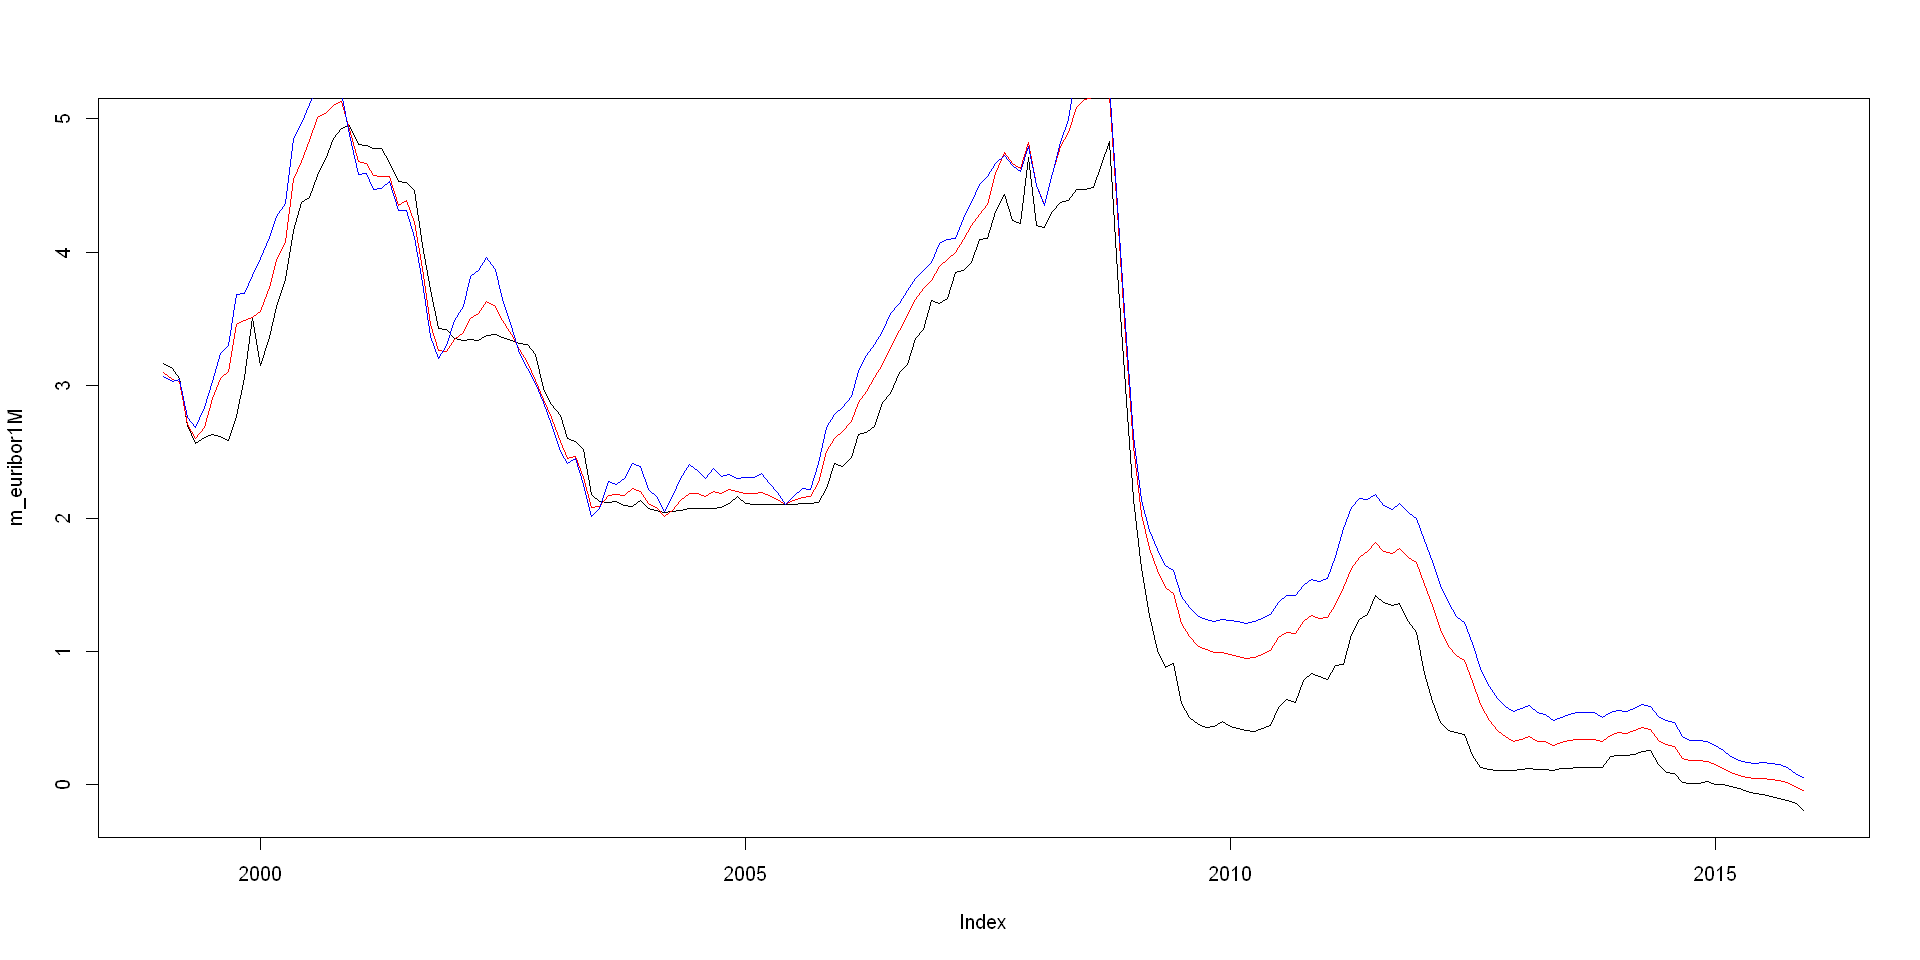

In [41]:
options(repr.plot.width=16, repr.plot.height=8)
# 
# Computation of a coarser grid using the yearmon function. First we use the function time
# which creates the vector of times at which the euribor1Y time series was sampled. This 
# vector is then transformed into monthly data by means of the yearmon function. 
# For each item only the information about mounth and year are retained. Finally we 
# transform back the series so calculated into date type. The result of this computation is
# a vector which contains only the date corresponding to the first day of any month find in
# the original time series.
#
m_index      <- as.Date(as.yearmon(time(euribor1Y)))
# creo una nuova serie aggregando i dati di euribor1M sul nuovo indice temporale
# (base mensile) e calcolando la media
m_euribor1M  <- aggregate(euribor1M, m_index, mean)
m_euribor6M  <- aggregate(euribor6M, m_index, mean)
m_euribor1Y  <- aggregate(euribor1Y, m_index, mean)

plot (m_euribor1M, typ='l')
lines(m_euribor6M, col='red')
lines(m_euribor1Y, col='blue')

## Average deposit rate from Bankit database

In [42]:
file_name = paste(getwd(), 'tassi_medi_cc_bankit.csv', sep="/")
tassi <- read.csv(file_name, sep=';')

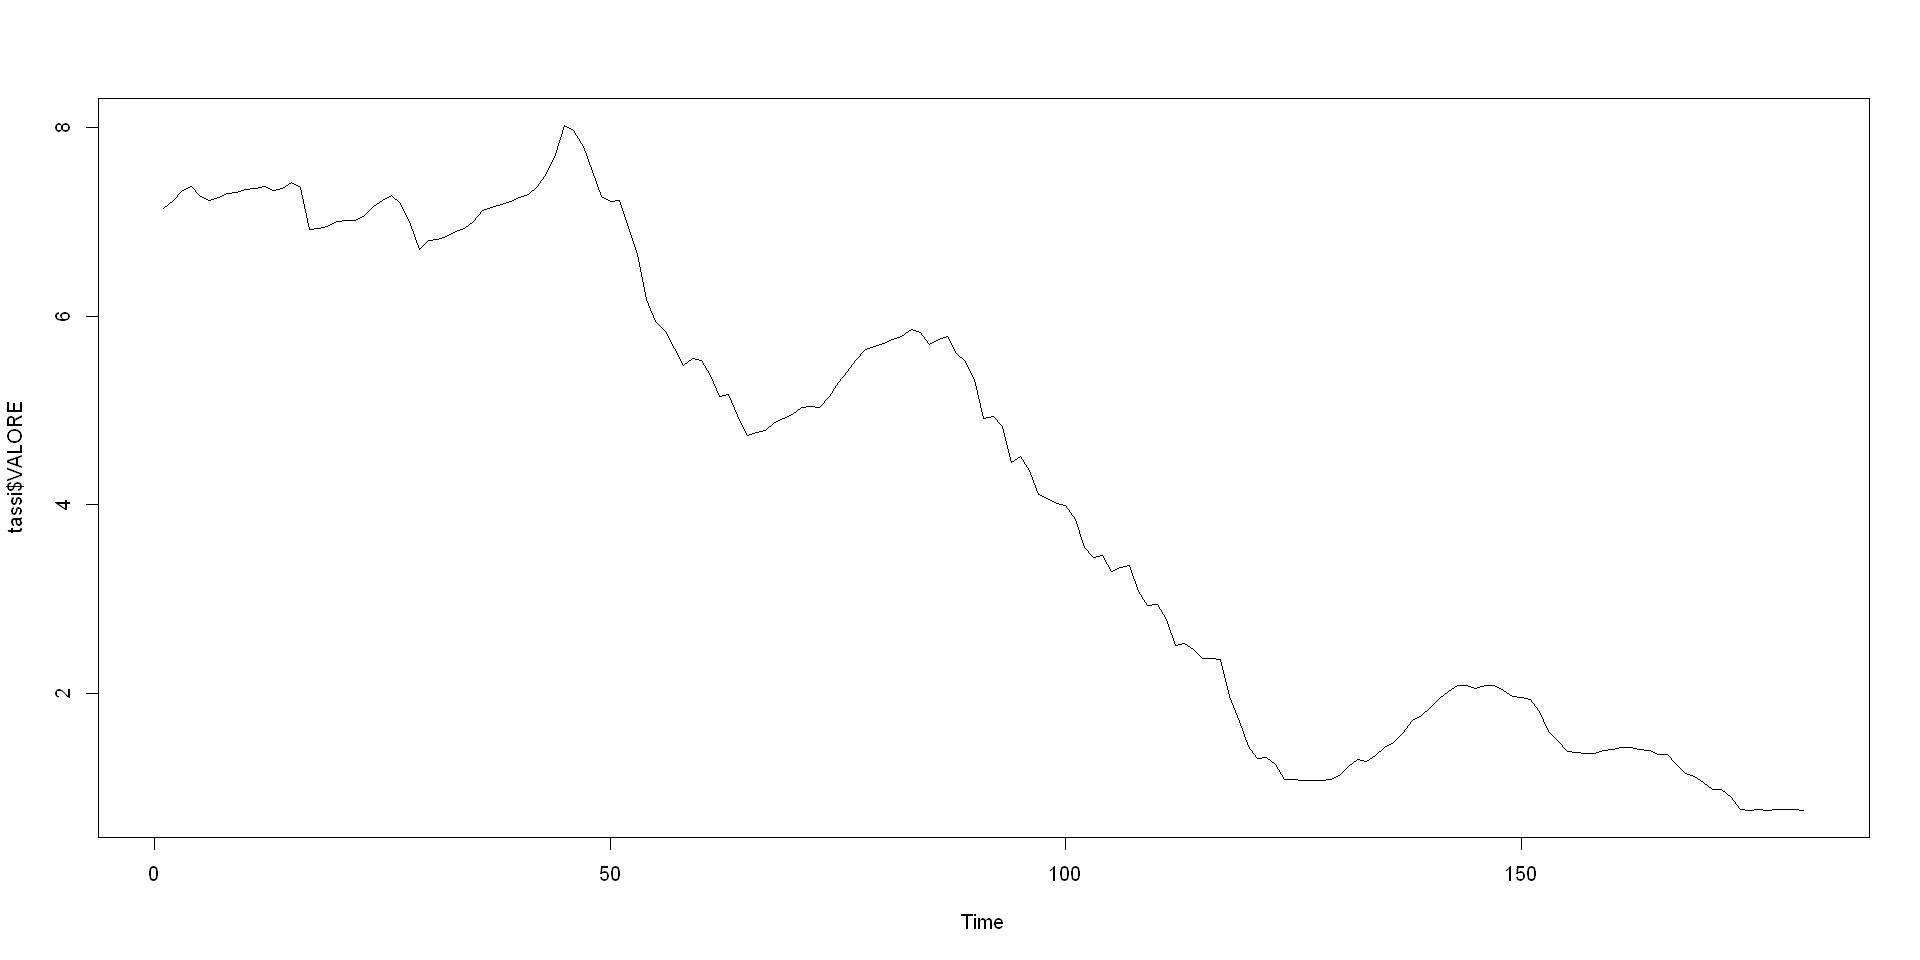

In [43]:
plot.ts(tassi$VALORE)

The file 'confronto.csv' was generated by taking the overlap period between the two time series of rates, mean value of the Italian banking system and the 1-month Euribor rate. The overlapping range is from January 1999 to December 2004. The series have a monthly frequency.

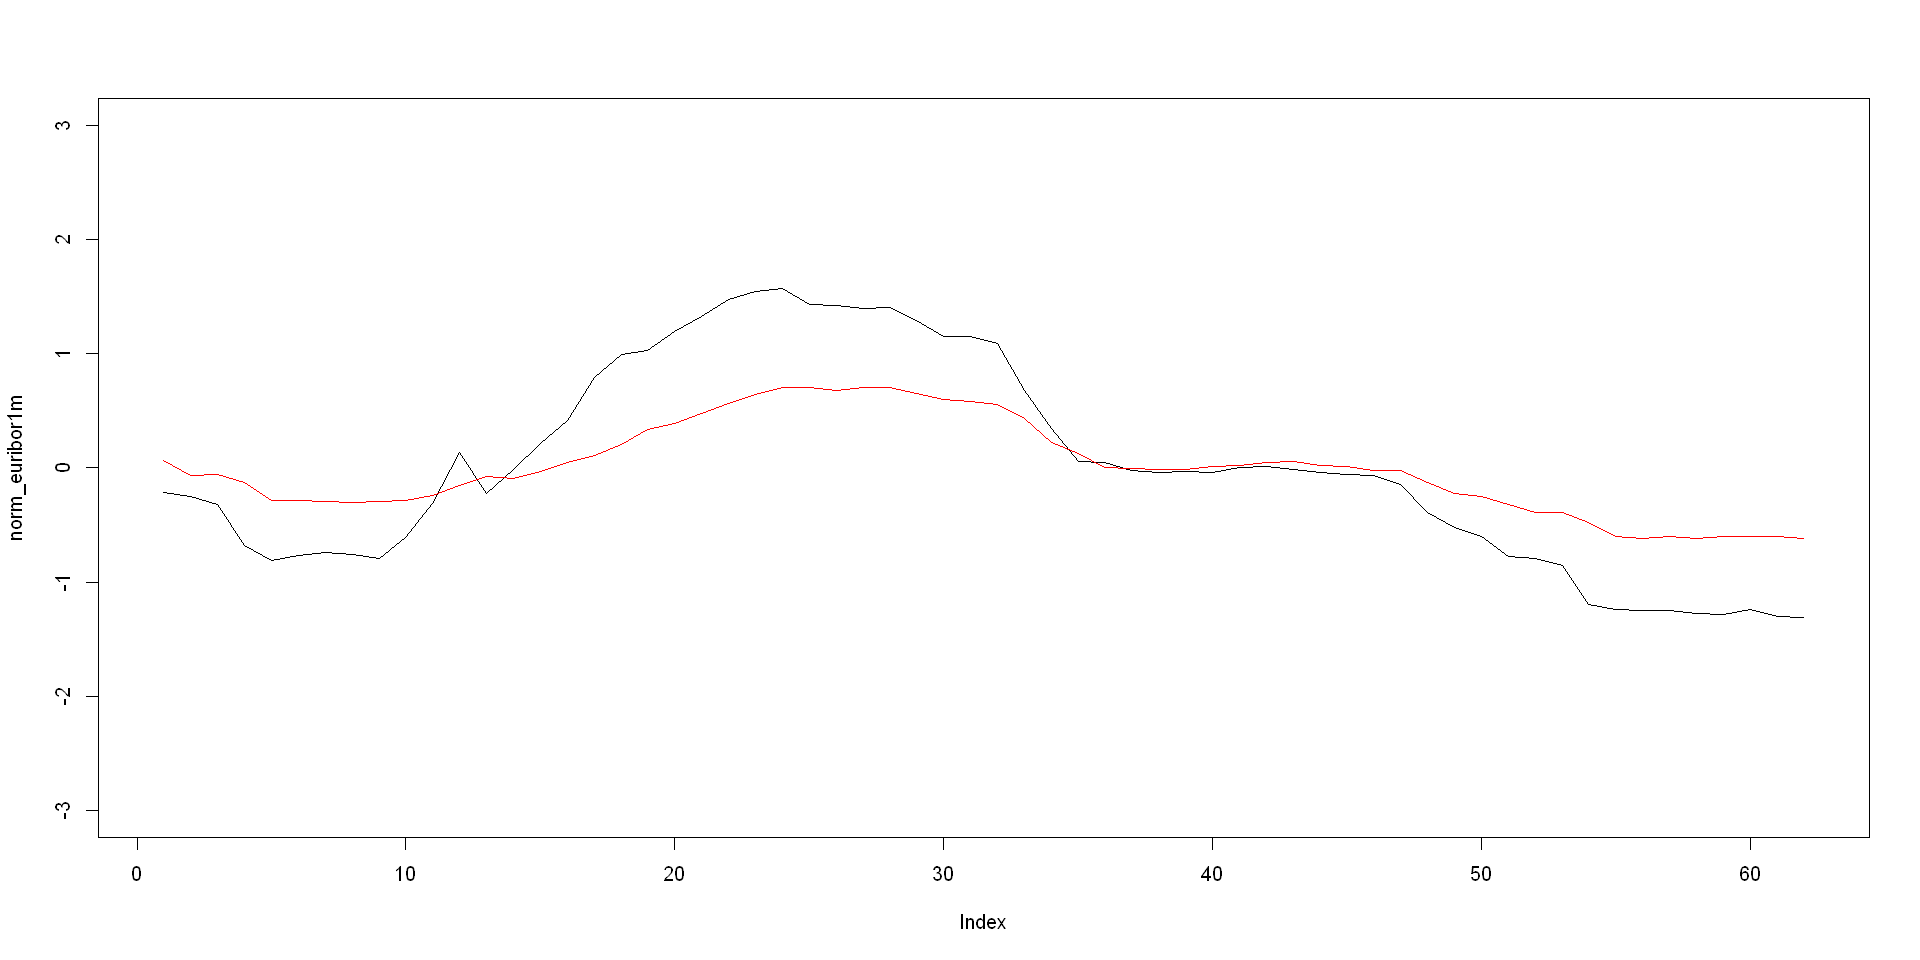

In [44]:
file_name = paste(getwd(), 'confronto.csv', sep="/")
tassi <- read.csv(file_name, sep=';')

norm_euribor1m <- tassi$EURIBOR1M-mean(tassi$EURIBOR1M)
norm_bank_rate <- tassi$TASSO_BANCA-mean(tassi$TASSO_BANCA)

plot(norm_euribor1m, type = 'l',ylim=c(-3,3))
lines(norm_bank_rate,col='red')

In [45]:
cor(norm_euribor1m, norm_bank_rate)
ccf(norm_euribor1m, norm_bank_rate,lag.max=5, plot=FALSE)

[1] 0.9756003


Autocorrelations of series 'X', by lag

   -5    -4    -3    -2    -1     0     1     2     3     4     5 
0.776 0.846 0.902 0.944 0.973 0.976 0.921 0.855 0.776 0.689 0.594 

## Example 1.9 Moving Averages and Filtering

Considering a white noise $w_t$, in this example we replace this noise with an average of its current value and its immediate neighbors in the past and future, that is
$$ v_t=\frac{1}{3}(w_{t-1} + w_t + w_{t+1})$$
A linear combination of values in a time series is referred generically, to as a filtered series, hence we use the command "filter"

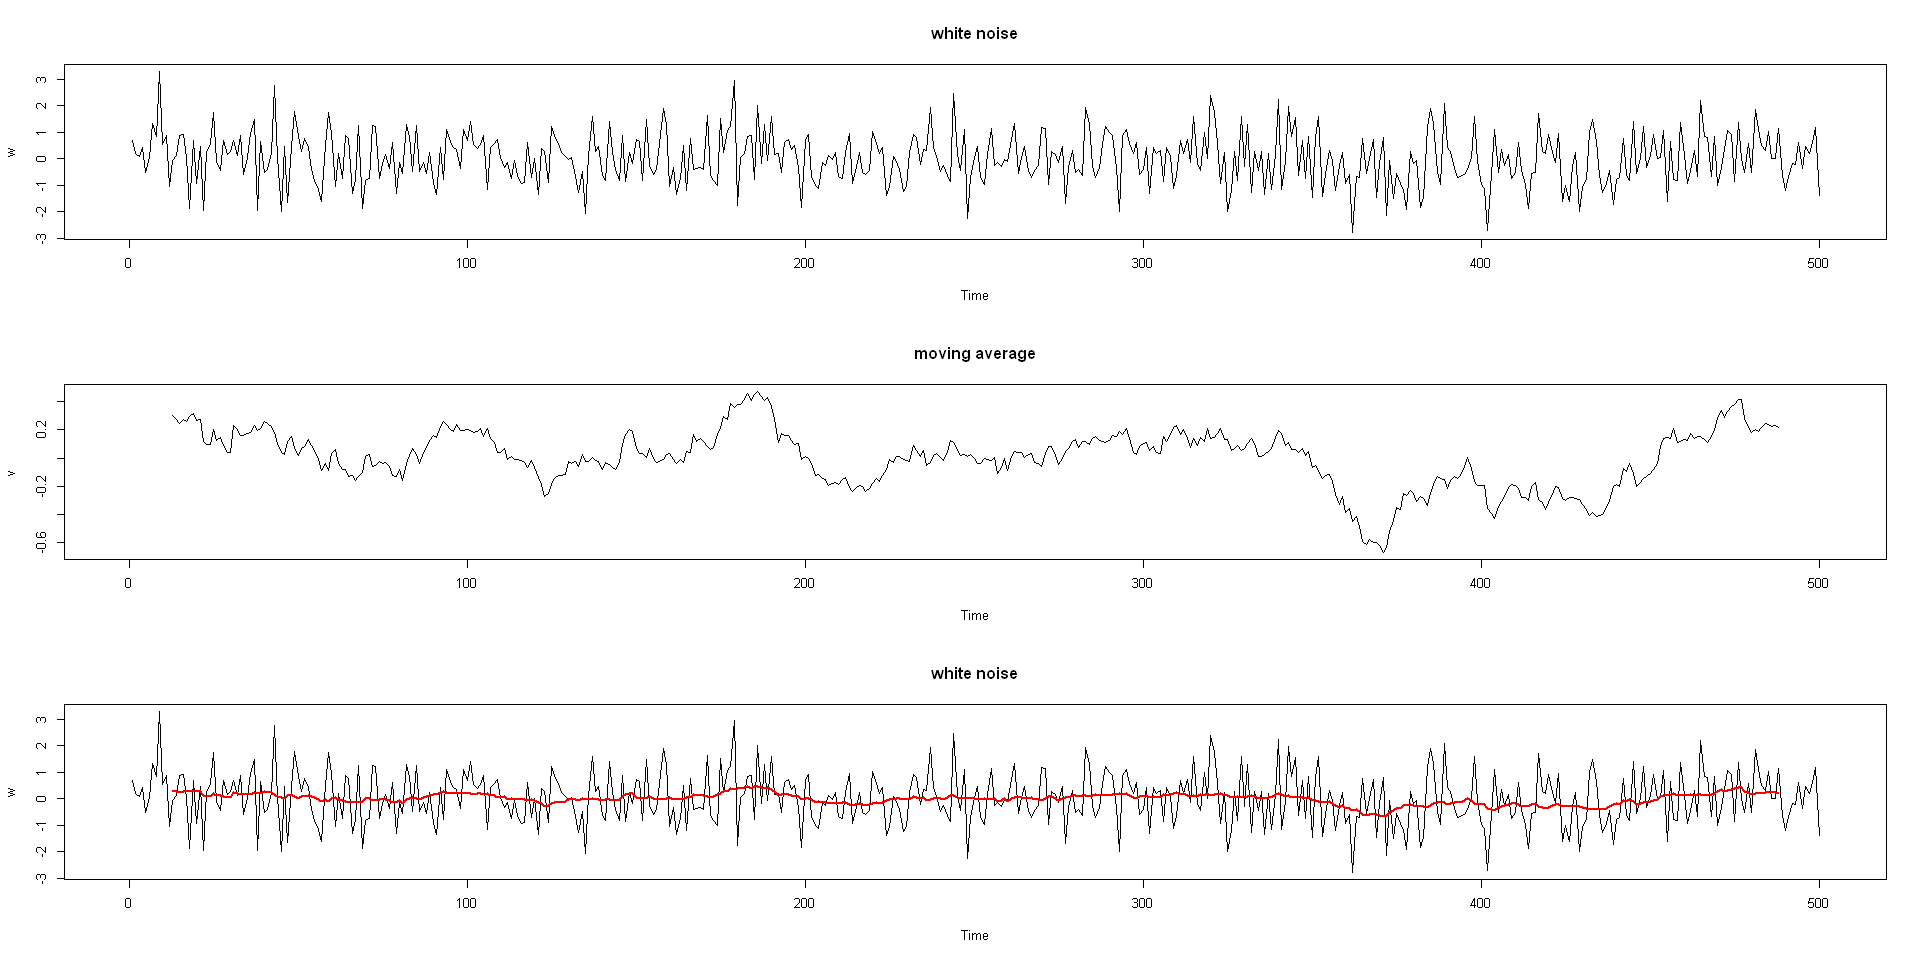

In [46]:
npoints = 500
size    = 25

w=rnorm(npoints)
v=filter(w,sides=2,filter=rep(1/size,size))

par(mfrow=c(3,1))
plot.ts(w, main='white noise')
plot.ts(v, main='moving average')
plot.ts(w, main='white noise')
lines(v, col='red', lwd=2)

### Autocovariance

The autocovariance function is defined as the second moment product

\begin{equation}
 \gamma (s,t) = cov(x_s,x_t) = E[(x_s-\mu_s)(x_t-\mu_t)]
\end{equation}

The white noise series $w_t$ has $\mathbb{E}(w_t)=0$ and 
$$
\gamma_w(t,s)= cov(w_s, w_t) = \begin{cases} \sigma^2_w & s=t, \\ 0 & s \ne t
\end{cases}
$$

In order to test this result we'll use the function shift which produce a shifted vector of a predefined amount.

In [47]:
shift<-function(x,shift_by){
  stopifnot(is.numeric(shift_by))
  stopifnot(is.numeric(x))
  
  if (length(shift_by)>1)
    return(sapply(shift_by,shift, x=x))
  
  out<-NULL
  abs_shift_by=abs(shift_by)
  if (shift_by > 0 )
    out<-c(tail(x,-abs_shift_by),rep(NA,abs_shift_by))
  else if (shift_by < 0 )
    out<-c(rep(NA,abs_shift_by), head(x,-abs_shift_by))
  else
    out<-x
  out
}

For example let's produce a shifted series of the white noise. Note that, in order to avoid NA points, we have to take only $n - 1$ points where $n$ is the original length of the $w$ series.

In [48]:
n  = length(w)
ww = shift(w, 1)[1:n-1]
w  = w[1:n-1] 

cat('covariance of w(t,t+1) = ',  cov(w,ww), "\n")

covariance of w(t,t+1) =  0.05629622 


Let's compute the autocovariance of the moving average process. 
The process is described by the filter

$$ v_t=\frac{1}{3}(w_{t-1} + w_t + w_{t+1})$$

Then

$$\gamma(s,t)=cov \left[ \frac{1}{3}(w_{s-1} + w_s + w_{s+1}), \frac{1}{3}(w_{t-1} + w_t + w_{t+1})  \right]$$

We can summarize the values for all $s$ and $t$ for the $v$ process as:

$$
\gamma_v(s,t)= \begin{cases}
\frac{3}{9} \sigma^2_w & s=t, \\
\frac{2}{9} \sigma^2_w & \vert s - t \vert = 1, \\
\frac{1}{9} \sigma^2_w & \vert s - t \vert = 2, \\
0                      & \vert s - t \vert > 2 \\
\end{cases}
$$

Let's try to test these results

In [49]:
v = v[3:length(v)-1]

cat('variance of v        = ',  var(w), "\n")
cat('covariance of v(t,t) = ',  cov(v,v), "\n")
cat('3*sigma^2 / 9        = ',  3*var(w)/9, "\n")


variance of v        =  0.899543 
covariance of v(t,t) =  NA 
3*sigma^2 / 9        =  0.2998477 


In [50]:
n  = length(v)
vv = shift(v,1)
vv = vv[1:n-1]
v  = v[1:n-1]

cat('covariance of v(t,t+1) = ',  cov(v,vv), "\n")
cat('2*sigma^2 / 9          = ',  2*var(w)/9, "\n")


covariance of v(t,t+1) =  NA 
2*sigma^2 / 9          =  0.1998984 


In [51]:
n  = length(v)
vv = shift(vv,1)
vv = vv[1:n-1]
v  = v[1:n-1]

cat('covariance of v(t,t+2) = ',  cov(v,vv), "\n")
cat('1*sigma^2 / 9          = ',  1*var(w)/9, "\n")


covariance of v(t,t+2) =  NA 
1*sigma^2 / 9          =  0.09994922 


In [52]:
n  = length(v)
vv = shift(vv,1)
vv = vv[1:n-1]
v  = v[1:n-1]

cat('covariance of v(t,t+3) = ',  cov(v,vv), "\n")

covariance of v(t,t+3) =  NA 


### The autocorrelation function

The autocorrelation function (ACF) is defined as

$$
\rho(s,t) = \frac{\gamma(s,t)}{\sqrt{\gamma(s,s)\gamma(t,t)}}
$$

For the three-point moving average process we have:

$$
\rho_v(h)= \begin{cases}
1 & h=0, \\
\frac{2}{3} & \vert h\vert = 1, \\
\frac{1}{3} & \vert h\vert = 2, \\
0           & \vert h\vert > 2 \\
\end{cases}
$$


In [38]:
#v = v[3: length(v)-1]
acf(v, lag.max=10, plot=FALSE)
ccf(v,v, lag.max=10)

ERROR: Error in na.fail.default(as.ts(x)): missing values in object


## Example 1.10 Autoregression

Suppose we consider the white noise of the previous example as input and calculate the output using the second-order equation
$$x_t=x_{t-1} -.9 x_{t-2}+w_t $$
This equation represents a regression or prediction of the current value of $x_t$ of a time series as a function of the past two values of the series and, hence, the term 'autoregression' is used for this model

In [ ]:
w=rnorm(550,0,1)
x= filter(w, filter=c(1,-.9),method="recursive")[-(1:50)]
plot.ts(x, main="autoregression")

Another simple example. Consider the process
$$y_t = \alpha y_{t-1} + w$$

In [ ]:
require('stats')

npoints = 1000
alpha   = .9

w=rnorm(npoints)
y = filter(w, filter=c(alpha),method="recursive")
#y  = arima.sim(model=list(ar=alpha), n=npoints)

cat('y variance (measured)  = ',  var(y), "\n")
cat('y variance (predicted) = ', 1/(1-alpha*alpha),"\n")

plot.ts(y, main="autoregression")

rho=acf(y, plot=FALSE, lag.max=30)
xx = seq(0,30)
yy = alpha**xx
plot(rho$lag, rho$acf)
lines(xx,yy,col='red')



It is worth noting that the AR processes $AR(p)$ with $p > 1$ may have cyclical trends. This happens if and only if among the roots of the polynomial $A(z)$ there is a pair of complex conjugate numbers. In this case, the process assumes a cyclical pattern in which the amplitude of the oscillations varies around a mean value. 

Letìs consider for example the process
$$ y_t=1.5 y_{t-1} - 0.7 y_{t-2} + w$$

In [ ]:
w=rnorm(1000)
x= filter(w, filter=c(1.5,-0.7),method="recursive") 
plot.ts(x, main="autoregression")

## Example 1.11 Random walk with drift

In [ ]:
npoints = 250
drift   = .25

w = rnorm(npoints)
x = cumsum(w)

wd = w + drift
xd = cumsum(wd)

plot.ts(xd,ylim=c(-5,55),main="random walk",ylab='')
lines(x,col=4)
abline(h=0, col=4,  lty=2)
abline(a=0, b=drift,lty=2)

## Example 1.12 Signal in Noise

In [ ]:
cs     = 2*cos(2*pi*1:500/50+.6*pi)
wd     = 3*w
x      = seq(1:500)
xx     = .01 * x

signal = cs + wd + xx
v=filter(signal,sides=1,filter=rep(1/3,3))

plot.ts(signal)
lines(v,col='red')
lines(xx, col = 'blue')

reg=lm(signal~x)
abline(reg,col="yellow")

lines(cs + xx,col='green',lwd=2)